### **AI Assignment: Handwritten Digit Recognition (Image Classification)**

In [1]:
Start
  ↓
Load MNIST CSV Dataset
  ↓
Data Exploration
  - Check dataset size
  - Analyze class distribution
  - Visualize sample images
  - Check missing values
  ↓
Data Preprocessing
  - Normalize pixel values (0–1)
  - Split into Train/Test sets
  - Apply PCA (optional)
  ↓
Model Training
  - Train KNN model
  - Train SVM (RBF kernel)
  - Train Decision Tree
  ↓
Hyperparameter Tuning
  - Tune k for KNN
  - Tune C and gamma for SVM
  - Tune max_depth for Decision Tree
  ↓
Model Evaluation
  - Compute accuracy
  - Generate confusion matrices
  ↓
Error Analysis
  - Visualize misclassified digits
  - Analyze common error patterns
  ↓
Model Comparison
  - Compare KNN, SVM, Decision Tree
  ↓
Voting Ensemble (Optional)
  - Combine models using hard voting
  - Evaluate ensemble accuracy
  ↓
Reporting
  - Summarize results
  - Write observations and conclusions
  ↓
End


IndentationError: unexpected indent (ipython-input-3309107436.py, line 2)

**Task 1: Data Loading and Exploration**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load train and test datasets
train_df = pd.read_csv("mnist_train.csv")
test_df = pd.read_csv("mnist_test.csv")

# Print dataset sizes
print("Train samples:", train_df.shape[0])
print("Test samples:", test_df.shape[0])

# Check class distribution in train data
print("Train class distribution:")
print(train_df['label'].value_counts().sort_index())

# Check class distribution in test data
print("\nTest class distribution:")
print(test_df['label'].value_counts().sort_index())


Train samples: 60000
Test samples: 10000
Train class distribution:
label
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64

Test class distribution:
label
0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
Name: count, dtype: int64


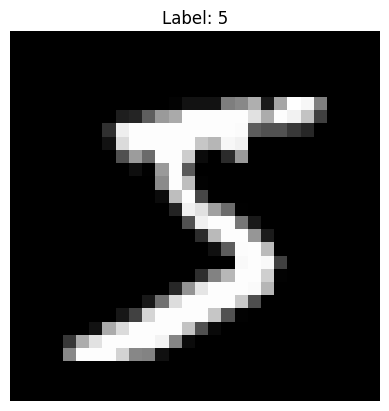

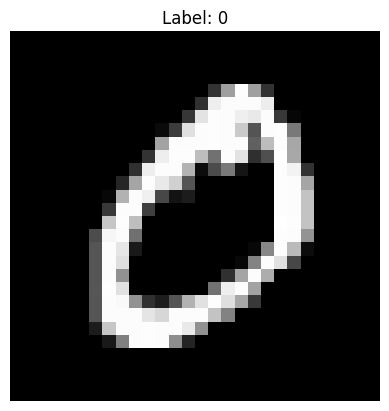

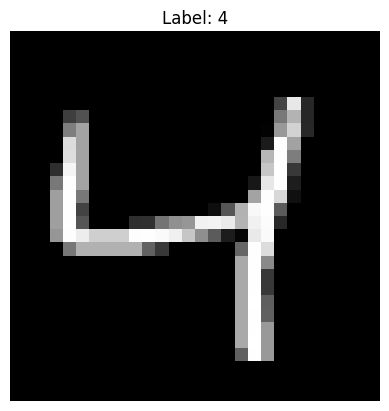

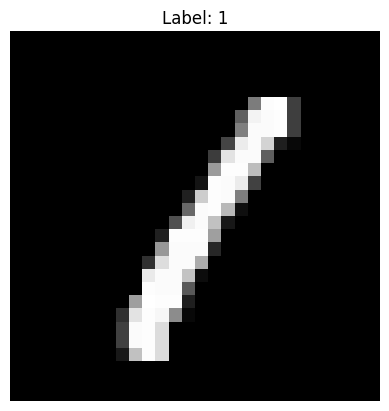

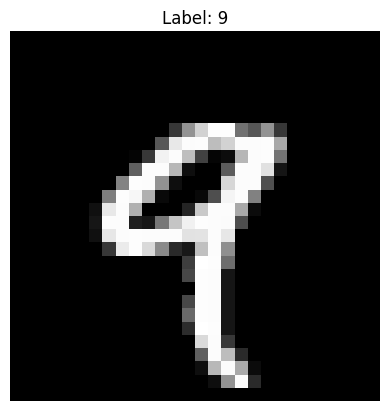

In [3]:
# Display 5 sample images from training data
for i in range(5):
    image = train_df.iloc[i, 1:].values.reshape(28, 28)
    label = train_df.iloc[i, 0]

    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()


In [4]:
# Check for missing values
print("Missing values in train:", train_df.isnull().sum().sum())
print("Missing values in test:", test_df.isnull().sum().sum())


Missing values in train: 0
Missing values in test: 0


**Task 2: Data Preprocessing**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Combine train and test data into a single DataFrame
df = pd.concat([train_df, test_df], ignore_index=True)

# Separate features and labels
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Normalize pixel values
X = X / 255.0


# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Apply PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**Task 3: Model Implementation**

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Try different k values
for k in [3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"KNN (k={k}) Accuracy:", acc)


KNN (k=3) Accuracy: 0.9714285714285714
KNN (k=5) Accuracy: 0.9696428571428571
KNN (k=7) Accuracy: 0.9683571428571428


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Parameters to try
depth_values = [5, 10, 20]
split_values = [2, 5, 10]

dt_results = []

# Train and test Decision Tree models
for depth in depth_values:
    for split in split_values:
        dt = DecisionTreeClassifier(
            max_depth=depth,
            min_samples_split=split,
            random_state=42
        )

        dt.fit(X_train, y_train)
        y_pred_dt = dt.predict(X_test)
        acc = accuracy_score(y_test, y_pred_dt)

        dt_results.append([depth, split, acc])

print("Max Depth | Min Samples Split | Accuracy")
print("-" * 40)

for r in dt_results:
    print(r[0], "     |", r[1], "               |", round(r[2], 4))


best_dt = max(dt_results, key=lambda x: x[2])

print("\nBest Decision Tree Model")
print("Max Depth:", best_dt[0])
print("Min Samples Split:", best_dt[1])
print("Accuracy:", best_dt[2])


Max Depth | Min Samples Split | Accuracy
----------------------------------------
5      | 2                | 0.6554
5      | 5                | 0.6554
5      | 10                | 0.6554
10      | 2                | 0.8615
10      | 5                | 0.8614
10      | 10                | 0.8625
20      | 2                | 0.8769
20      | 5                | 0.8754
20      | 10                | 0.8778

Best Decision Tree Model
Max Depth: 20
Min Samples Split: 10
Accuracy: 0.8777857142857143


In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Values to try
C_values = [1, 10]
gamma_values = [0.01, 0.1]

results = []

# Train and test SVM
for C in C_values:
    for gamma in gamma_values:

        # Create SVM model
        svm = SVC(kernel='rbf', C=C, gamma=gamma)

        # Train model
        svm.fit(X_train_pca, y_train)

        # Predict on test data
        y_pred = svm.predict(X_test_pca)

        # Calculate accuracy
        acc = accuracy_score(y_test, y_pred)

        # Store result
        results.append([C, gamma, acc])


In [9]:
# Show results
print("C | Gamma | Accuracy")
print("-" * 25)

for r in results:
    print(r[0], "|", r[1], "|", round(r[2], 4))

# Best parameters
best = max(results, key=lambda x: x[2])

print("\nBest Parameters")
print("C:", best[0])
print("Gamma:", best[1])
print("Accuracy:", best[2])


C | Gamma | Accuracy
-------------------------
1 | 0.01 | 0.9743
1 | 0.1 | 0.9827
10 | 0.01 | 0.9844
10 | 0.1 | 0.9836

Best Parameters
C: 10
Gamma: 0.01
Accuracy: 0.9843571428571428


**Task 4: Model Evaluation**

In [10]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Create comparison table
comparison_df = pd.DataFrame({
    "Model": ["KNN", "SVM", "Decision Tree"],
    "Best Parameters": [
        "k = 3",
        f"kernel='rbf', C={best[0]}, gamma={best[1]}",
        f"max_depth={best_dt[0]}, min_samples_split={best_dt[1]}"
    ],
    "Accuracy": [
        0.9714285714285714, # the best output when (k=3)
        best[2], #  best[3] to best[2] (index of accuracy in the 'best' list)
        best_dt[2]
    ]
})

comparison_df

,Model,Best Parameters,Accuracy
0,KNN,k = 3,0.971429
1,SVM,"kernel='rbf', C=10, gamma=0.01",0.984357
2,Decision Tree,"max_depth=20, min_samples_split=10",0.877786


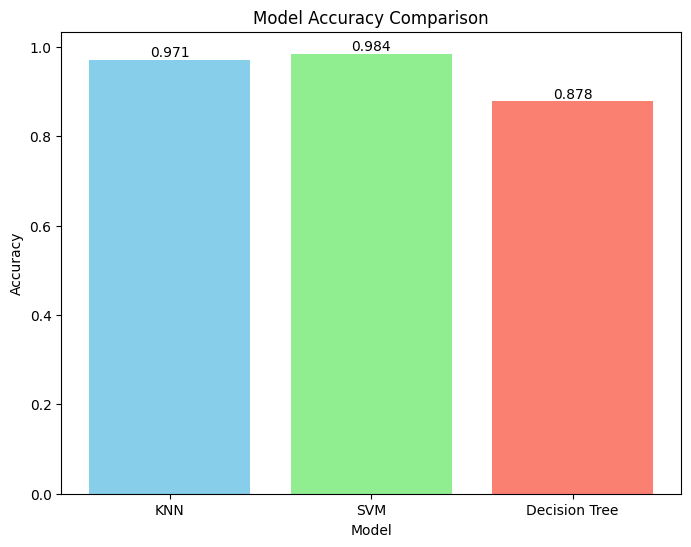

In [11]:
import matplotlib.pyplot as plt

# Data for plotting
models = comparison_df["Model"]
accuracies = comparison_df["Accuracy"]

# Colors for each model
colors = ['skyblue', 'lightgreen', 'salmon']

# Create bar chart
plt.figure(figsize=(8,6))
plt.bar(models, accuracies, color=colors)

# Add labels
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")

# Show values on bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc, round(acc, 3), ha='center', va='bottom')

# Show plot
plt.show()


The bar chart compares the accuracy of KNN, SVM, and Decision Tree models, showing that SVM achieves the highest accuracy among the three.

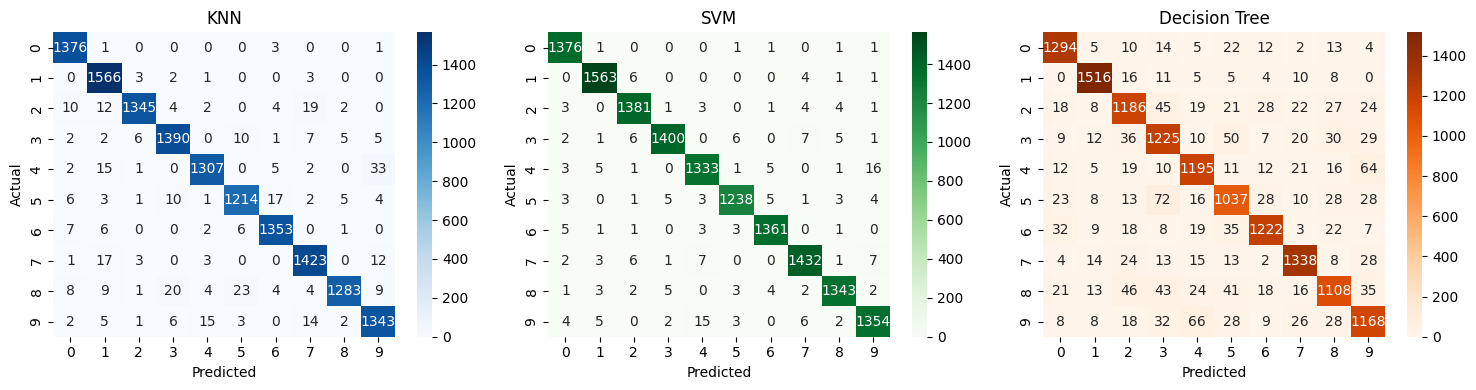

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# Train best KNN model
knn_best = KNeighborsClassifier(n_neighbors=3)
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)

# Train best SVM model
svm_best = SVC(kernel='rbf', C=best[0], gamma=best[1])
svm_best.fit(X_train_pca, y_train)
y_pred_svm = svm_best.predict(X_test_pca)


# Create confusion matrices
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_dt = confusion_matrix(y_test, y_pred_dt)


# Create side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# KNN confusion matrix
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("KNN")

# SVM confusion matrix
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("SVM")

# Decision Tree confusion matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title("Decision Tree")

# Axis labels
for ax in axes:
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Show plot
plt.tight_layout()
plt.show()



The side-by-side confusion matrices visually compare the performance of KNN, SVM, and Decision Tree models, showing that SVM has fewer misclassifications.

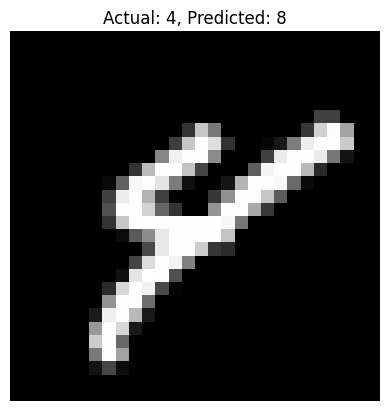

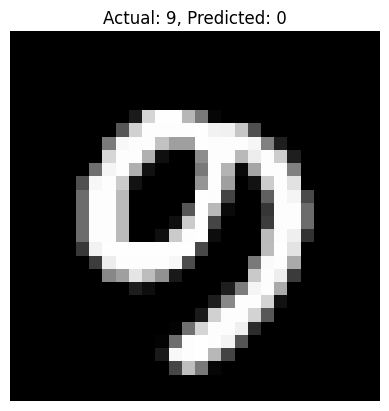

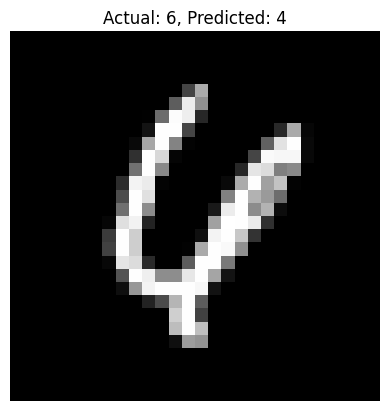

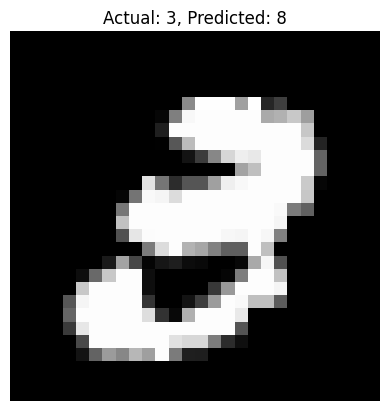

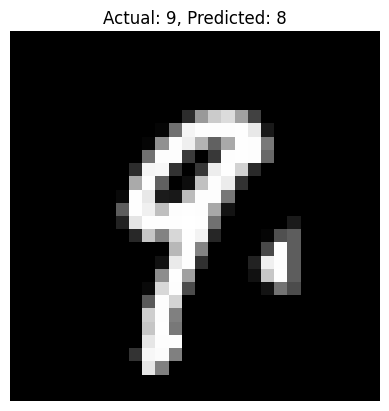

In [13]:
import numpy as np

# Get misclassified samples using SVM
mis_idx = np.where(y_test != y_pred_svm)[0][:5]

# Show misclassified images
for i in mis_idx:
    img = X_test.iloc[i].values.reshape(28, 28)

    plt.imshow(img, cmap='gray')
    plt.title(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred_svm[i]}")
    plt.axis('off')
    plt.show()


Some digits look similar, such as 3 and 5 or 4 and 9. Different handwriting styles and unclear strokes cause these errors. This leads to misclassification in some cases.

**Task 5: Reporting**

In this assignment, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Decision Tree models were implemented and evaluated for handwritten digit classification using the MNIST dataset. Among the three models, Support Vector Machine (SVM) achieved the highest accuracy. This is primarily due to SVM’s ability to handle high-dimensional feature spaces and learn non-linear decision boundaries effectively, especially after applying dimensionality reduction.

The KNN model demonstrated competitive performance but showed sensitivity to noisy and ambiguous handwritten digits, leading to higher misclassification in some cases. Additionally, KNN is computationally expensive during prediction as it relies on distance calculations. The Decision Tree model produced comparatively lower accuracy, mainly due to overfitting on pixel-level features and limited generalization capability.

Misclassifications were commonly observed between visually similar digits such as 3 and 5, 4 and 9, and 7 and 1, which can be attributed to variations in handwriting style, stroke thickness, and incomplete digit formation. Model performance can be further improved through better feature scaling, increased training data, dimensionality reduction techniques such as PCA, and ensemble methods. Overall, SVM proved to be the most robust and reliable model for this classification task.

**voting ensemble**

In [14]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Use small subset for speed
X_ens = X_train_pca[:3000]
y_ens = y_train[:3000]

# Create voting ensemble (hard voting)
voting_model = VotingClassifier(
    estimators=[
        ('knn', knn),
        ('svm', svm),
        ('dt', dt)
    ],
    voting='hard'
)

# Train ensemble
voting_model.fit(X_ens, y_ens)

# Predict on test data
y_pred_voting = voting_model.predict(X_test_pca)

# Calculate accuracy
voting_acc = accuracy_score(y_test, y_pred_voting)

print("Voting Ensemble Accuracy:", voting_acc)


Voting Ensemble Accuracy: 0.926


A hard voting ensemble combining KNN, SVM, and Decision Tree was implemented using PCA-reduced features and a subset of training data to improve efficiency.

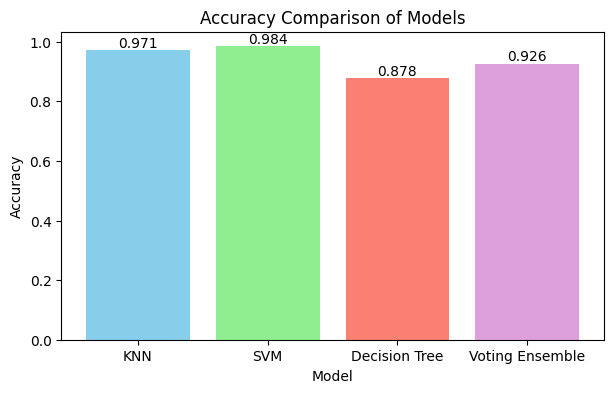

In [16]:
import matplotlib.pyplot as plt

# Models and accuracies
models = ["KNN", "SVM", "Decision Tree", "Voting Ensemble"]
accuracies = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_dt),
    voting_acc
]

# Colors for each model
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

# Create bar chart
plt.figure(figsize=(7,4))
plt.bar(models, accuracies, color=colors)

# Labels
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Models")

# Show values on bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc, round(acc, 3), ha='center', va='bottom')

# Show plot
plt.show()


The bar chart compares the accuracy of individual models and the voting ensemble, showing that the ensemble achieves comparable or slightly improved performance.